# Практика 3

### 1.3.1 Задание
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.

Евклидово расстояние между точками 1 и 2: 7.0710678118654755
Квадрат Евклидова расстояния между точками 1 и 2: 50
Расстояние Чебышева между точками 1 и 2: 5
Расстояние Хэмминга между точками 1 и 2: 3
Евклидово расстояние между точками 1 и 3: 6.4031242374328485
Квадрат Евклидова расстояния между точками 1 и 3: 41
Расстояние Чебышева между точками 1 и 3: 6
Расстояние Хэмминга между точками 1 и 3: 3
Евклидово расстояние между точками 1 и 4: 7.0
Квадрат Евклидова расстояния между точками 1 и 4: 49
Расстояние Чебышева между точками 1 и 4: 6
Расстояние Хэмминга между точками 1 и 4: 3
Евклидово расстояние между точками 2 и 3: 12.449899597988733
Квадрат Евклидова расстояния между точками 2 и 3: 155
Расстояние Чебышева между точками 2 и 3: 11
Расстояние Хэмминга между точками 2 и 3: 3
Евклидово расстояние между точками 2 и 4: 11.090536506409418
Квадрат Евклидова расстояния между точками 2 и 4: 123
Расстояние Чебышева между точками 2 и 4: 11
Расстояние Хэмминга между точками 2 и 4: 3
Евклидово р

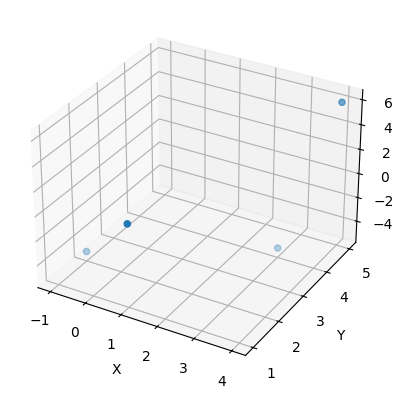

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

points = np.array([(1, 1, 1), (4, 5, 6), (-1, 2, -5), (3, 4, -5)])

def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def squared_euclidean_distance(point1, point2):
    return np.sum((point1 - point2) ** 2)

def chebyshev_distance(point1, point2):
    return np.max(np.abs(point1 - point2))

def hamming_distance(point1, point2):
    return np.sum(point1 != point2)

for i in range(4):
    for j in range(i + 1, 4):
      print(f"Евклидово расстояние между точками {i + 1} и {j + 1}:", euclidean_distance(points[i], points[j]))
      print(f"Квадрат Евклидова расстояния между точками {i+ 1} и {j + 1}:", squared_euclidean_distance(points[i], points[j]))
      print(f"Расстояние Чебышева между точками {i + 1} и {j + 1}:", chebyshev_distance(points[i], points[j]))
      print(f"Расстояние Хэмминга между точками {i + 1} и {j + 1}:", hamming_distance(points[i], points[j]))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = points.T
ax.scatter(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### 1.3.2 Задание
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.

In [2]:
import numpy as np

Z = np.zeros((5, 5))
Z += np.arange(5)

print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


### 2.3.1 Задание
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

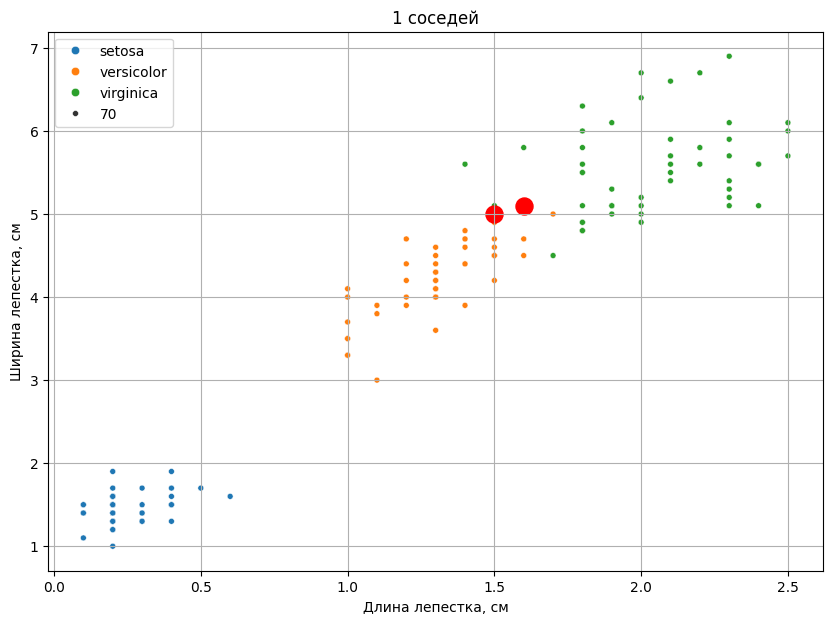

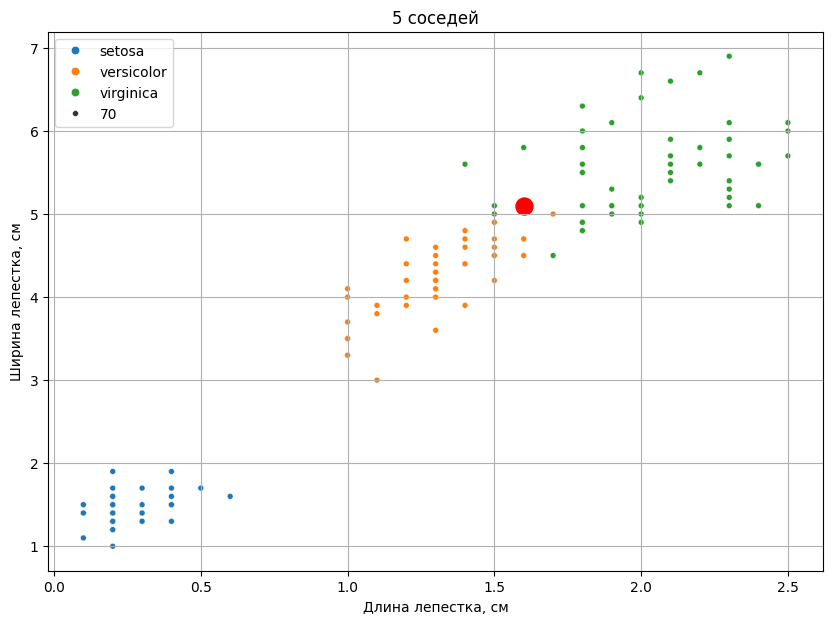

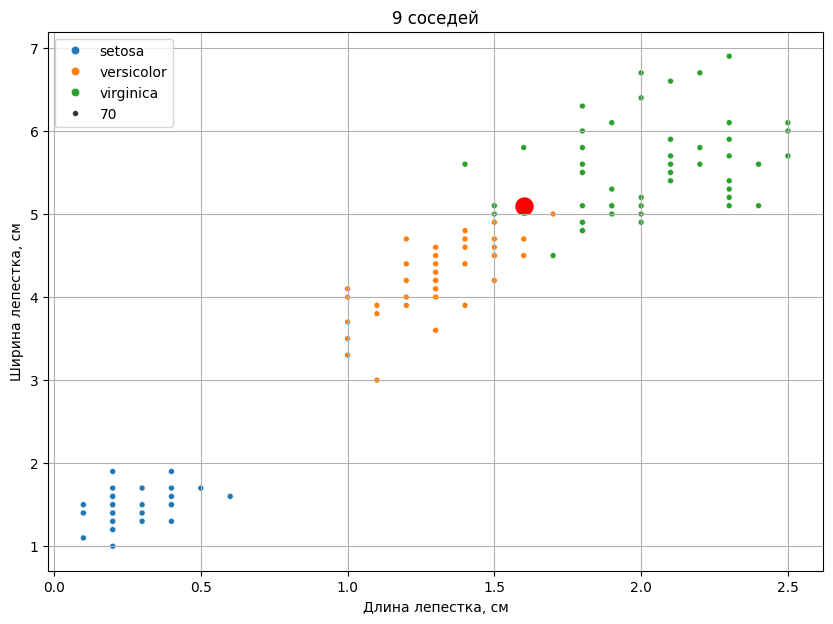

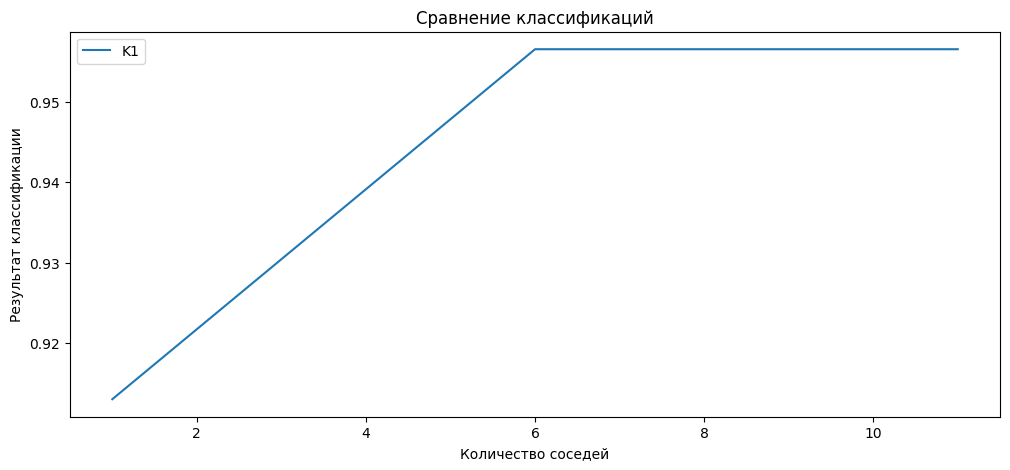

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# url = './iris.csv'
# iris = pd.read_csv(url)
iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size=0.15
)

k1_acc = []

for i in range(1,12, 4):
    model = KNeighborsClassifier(n_neighbors=i + 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    k1_acc.append(accuracy_score(y_test, y_pred))
    plt.figure(figsize = (10,7))
    sns.scatterplot(data = iris, x = 'petal_width', y = 'petal_length', hue = 'species', size=70)
    plt.title(str(i) + " соседей")
    plt.xlabel('Длина лепестка, см')
    plt.ylabel('Ширина лепестка, см')
    plt.legend(loc=2)
    plt.grid()
    for i in range(len(y_test)):
        if np.array(y_test)[i] != y_pred[i]:
            plt.scatter(X_test.iloc[i,3], X_test.iloc[i,2], color = 'red', s=150)


x = [i for i in range(1, 12, 5)]



_, ax4 = plt.subplots(figsize=(12, 5))
ax4.set_title("Сравнение классификаций")
ax4.plot(x, k1_acc, label="K1")
ax4.set_xlabel("Количество соседей")
ax4.set_ylabel("Результат классификации")
ax4.legend()

### 3.3.2 Задание
Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [4]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{'левша':7, 'правша':4},
             {'правша':3, 'обе руки':7},
             {'левша':6, 'обе руки':1},
             {'правша':0, 'левша':5}]
directorizer = DictVectorizer(sparse = False)
features = directorizer.fit_transform(data_dict)
features

array([[7., 0., 4.],
       [0., 7., 3.],
       [6., 1., 0.],
       [5., 0., 0.]])